# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [176]:
import pandas as pd
import numpy as np
import os
import requests
import tweepy
import json
import time
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
#import everything that will be used in this project

In [177]:
tw_archive = pd.read_csv('twitter-archive-enhanced.csv')
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [178]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url, allow_redirects=True)

with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [179]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t') 
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [180]:
from tweepy import OAuthHandler

In [181]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'
bearer_token = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [182]:
# NOTE TO REVIEWER: I was only able to access the Twitter API V2, which 
# is much more limited on the api call options that can be made -- on all the instructed data points to extract in the 
# description of this project "get status, favorite count, retweet count, all gave the following error:
#"453 - You currently have Essential access which includes access to Twitter API v2 endpoints only. 
# If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal."

## For the sake of completing the project I will move forward using the 'tweet_json.txt' file provided in the 
## course to get the necessary data.

In [183]:
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url, allow_redirects=True)
with open ('tweet.json', mode='wb') as file:
    file.write(response.content)

In [184]:
df_tweet = pd.read_json('tweet.json', lines=True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [185]:
# Assess column data visually 
df_tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [186]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [187]:
tw_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [188]:
# Getting a closer look at the columns and non-null counts
df_tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [189]:
#check for duplicate ids specifically just in case they have separate posts 
ids = df_tweet['id']
ids.duplicated(keep = 'first')

0       False
1       False
2       False
3       False
4       False
        ...  
2349    False
2350    False
2351    False
2352    False
2353    False
Name: id, Length: 2354, dtype: bool

In [190]:
## Appears to be no duplicates in the Tweet dataset

In [191]:
df_tweet.value_counts('possibly_sensitive')

possibly_sensitive
0.0    2211
dtype: int64

In [192]:
drop = df_tweet['entities']
drop.head(15)

0     {'hashtags': [], 'symbols': [], 'user_mentions...
1     {'hashtags': [], 'symbols': [], 'user_mentions...
2     {'hashtags': [], 'symbols': [], 'user_mentions...
3     {'hashtags': [], 'symbols': [], 'user_mentions...
4     {'hashtags': [{'text': 'BarkWeek', 'indices': ...
5     {'hashtags': [{'text': 'BarkWeek', 'indices': ...
6     {'hashtags': [], 'symbols': [], 'user_mentions...
7     {'hashtags': [], 'symbols': [], 'user_mentions...
8     {'hashtags': [{'text': 'BarkWeek', 'indices': ...
9     {'hashtags': [], 'symbols': [], 'user_mentions...
10    {'hashtags': [{'text': 'BarkWeek', 'indices': ...
11    {'hashtags': [], 'symbols': [], 'user_mentions...
12    {'hashtags': [], 'symbols': [], 'user_mentions...
13    {'hashtags': [], 'symbols': [], 'user_mentions...
14    {'hashtags': [{'text': 'BarkWeek', 'indices': ...
Name: entities, dtype: object

In [193]:
## Unusable data in the above format

In [194]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [195]:
##Checking for duplicate images
image_predictions.value_counts('jpg_url')

jpg_url
https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg                2
https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg                2
https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg                2
https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg                2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                2
                                                              ..
https://pbs.twimg.com/media/CVHdK-7WwAAsuyc.jpg                1
https://pbs.twimg.com/media/CVHRIiqWEAAj98K.jpg                1
https://pbs.twimg.com/media/CVHOgDvU4AAfrXD.jpg                1
https://pbs.twimg.com/media/CVHMyHMWwAALYXs.jpg                1
https://pbs.twimg.com/tweet_video_thumb/CtTFZZfUsAE5hgp.jpg    1
Length: 2009, dtype: int64

In [196]:
# get names of columns 
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [197]:
#check to see the least common values in breeds
breeds = image_predictions.value_counts('p1')
breeds.tail(50)

p1
leopard               1
limousine             1
lion                  1
long-horned_beetle    1
lorikeet              1
loupe                 1
lynx                  1
mailbox               1
marmot                1
killer_whale          1
maze                  1
microphone            1
microwave             1
military_uniform      1
minibus               1
mortarboard           1
mud_turtle            1
nail                  1
ocarina               1
orange                1
otter                 1
king_penguin          1
jersey                1
dhole                 1
grey_fox              1
dining_table          1
earthstar             1
electric_fan          1
envelope              1
espresso              1
fiddler_crab          1
fire_engine           1
flamingo              1
fountain              1
four-poster           1
giant_panda           1
African_crocodile     1
ice_lolly             1
groenendael           1
guenon                1
hammer                1
hand_blower  

In [198]:
# A lot of items/animals detected that are not dogs at all

In [199]:
# check for the most common values in breeds
breeds.head(40)

p1
golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
Staffordshire_bullterrier          20
German_shepherd                    20
Siberian_husky                     20
web_site                           19
Cardigan                           19
Eskimo_dog                         18
Shetland_sheepdog                  18
beagle                             18
teddy                              18
Maltese_dog                        18
Shih-Tzu                           17
Rottweile

### Quality issues


## Quality
1. Certain columns don’t have the appropriate data types.


2. Incorrectly extracted data in two datasets.


3. Completely empty columns in each dataset.


4. In the image dataset there are a lot of images where a dog was not detected at all, and in many cases detecting inanimate objects or other species of animals.


5. In the image predictions dataset there are multiple duplicate entries with the same jpg image url.


6. Source column in the tweets dataset displays the full html code for where the tweet was posted from, rather than just saying where it was coming from - Twitter for iPhone, Twitter Web Client, etc…


7. The dataset contains tweets that are retweets and we only want original tweets.


8. Column headers should be more descriptive and consistent across datasets

## Tidiness


9. Dog stage should be a single column but is incorrectly displayed in 4 separate columns.


10. Information about one type of observational unit (tweets) is unevenly spread across three different files/dataframes. 


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [200]:
# Make copies of original pieces of data
tweet_clean = df_tweet.copy()
image_clean = image_predictions.copy()
archive_clean = tw_archive.copy()

### Define Issue 1: Change the datatypes of incorrectly typed variables

### Code

In [201]:
tweet_clean.info()
image_clean.info()
archive_clean.info()
# Get dtypes for all data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [202]:
# Convert all int that I want to keep in final dataset to str to make it easier to merge

In [203]:
tweet_clean = tweet_clean.astype({"id": str})
image_clean = image_clean.astype({"tweet_id": str})
archive_clean = archive_clean.astype({"tweet_id": str})
archive_clean = archive_clean.astype({"rating_numerator": str})
archive_clean = archive_clean.astype({"rating_denominator": str})

### Test

In [204]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   object             
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [205]:
# Columns have been successfully converted into an object type

### Define Issue 2: Revise incorrectly extracted data by turning each observation into a null value

### Code

In [206]:
# Replace None in stage columns in archive dataset with empty string
archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True) 
archive_clean.puppo.replace('None', '', inplace=True)  

archive_clean.name.replace('None', '', inplace=True)
archive_clean.name.replace('a', '', inplace=True)
archive_clean.name.replace('such', '', inplace=True)
archive_clean.name.replace('getting', '', inplace=True)

# Replace 0.0 in tweet clean columns in tweet dataset with empty string

tweet_clean.possibly_sensitive.replace('0.0', '', inplace=True)
tweet_clean.possibly_sensitive.replace('0.0', '', inplace=True)  


### Test

In [207]:
archive_clean.value_counts('name')

name
           803
Charlie     12
Oliver      11
Cooper      11
Lucy        11
          ... 
Iggy         1
Ike          1
Iroh         1
Ito          1
Kial         1
Length: 954, dtype: int64

### Define Issue 3: Drop all unnecessary columns using drop function

### Code

In [208]:
# ** Attention reviewer: I have added the below code at the suggestion of previous reviews that said I did not
# remove retweets -- however, I did. This step is already addressed in issue #7 with less code while keeping 
# separate issues separated by identifying text of all posts that contain 'RT @' as per the *instructions given 
# from first reviewer -- for reference the previous csv provided in last submission ends 
# up the exact same result without this extra code and overlapping of separate specific issues 


archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]

In [209]:
# values to drop from archive dataset - 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
# 'retweeted_status_user_id', 'retweeted_status_timestamp'


# values to drop from tweet dataset - ['geo', 'coordinates', 'contributors', 'possibly_sensitive', 
# 'possibly_sensitive_appealable', 'retweeted', 'entities', 'extended_entities', 'quoted_status_id', 'quoted_status_id_str', 
#'quoted_status', 'retweeted_status', 'place', 'truncated', 'favorited', 'is_quote_status', 'in_reply_to_status_id',
# 'in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name'

# values to drop from image dataset - 'img_num'

archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                    'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

tweet_clean = tweet_clean.drop(['geo', 'coordinates', 'contributors', 'possibly_sensitive',
                                'possibly_sensitive_appealable', 'retweeted', 'entities', 'extended_entities', 
                                'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'retweeted_status', 
                                'place', 'truncated', 'favorited', 'is_quote_status', 'in_reply_to_status_id',
                                'in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str',
                                'in_reply_to_screen_name'], axis=1)

image_clean = image_clean.drop(['img_num'], axis=1)

### Test

In [210]:
archive_clean.info()
tweet_clean.info()
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   object
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   object
 6   rating_denominator  2175 non-null   object
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: object(12)
memory usage: 220.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  -----

### Define Issue 4: Identify images in image dataset that are not dogs and remove them from the dataset

### Code

In [211]:
image_clean = image_clean[image_clean.p1_dog]
image_clean = image_clean[image_clean.p2_dog]
image_clean = image_clean[image_clean.p3_dog]

### Test

In [212]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1243 non-null   object 
 1   jpg_url   1243 non-null   object 
 2   p1        1243 non-null   object 
 3   p1_conf   1243 non-null   float64
 4   p1_dog    1243 non-null   bool   
 5   p2        1243 non-null   object 
 6   p2_conf   1243 non-null   float64
 7   p2_dog    1243 non-null   bool   
 8   p3        1243 non-null   object 
 9   p3_conf   1243 non-null   float64
 10  p3_dog    1243 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 91.0+ KB


In [213]:
image_clean.value_counts('p1_dog')

p1_dog
True    1243
dtype: int64

In [214]:
# Went from 2075 entries to 1206 entries with only True values

### Define Issue 5: Detect any duplicates in image dataset and remove them

### Code

In [215]:
image_clean = image_clean.drop_duplicates(subset=['jpg_url'], keep = 'last')

### Test

In [216]:
test = image_clean.duplicated()
test.value_counts('')

False    1206
dtype: int64

In [217]:
# all 1206 values show no duplicates

### Define Issue 6: Replace the html code in each of the 'source' column observations with readable text

### Code

In [218]:
# Repeat below code for each dataset to replace source columns

In [219]:
tweet_clean.replace(to_replace='<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 
                    value='Twitter for iPhone', inplace=True)
tweet_clean.replace(to_replace='<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 
                    value='Vine', inplace=True)
tweet_clean.replace(to_replace='<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 
                    value='Twitter Web Client', inplace=True)
tweet_clean.replace(to_replace='<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 
                    value='TweetDeck', inplace=True)

In [220]:
archive_clean.replace(to_replace='<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 
                    value='Twitter for iPhone', inplace=True)
archive_clean.replace(to_replace='<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 
                    value='Vine', inplace=True)
archive_clean.replace(to_replace='<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 
                    value='Twitter Web Client', inplace=True)
archive_clean.replace(to_replace='<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 
                    value='TweetDeck', inplace=True)

In [221]:
image_clean.replace(to_replace='<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 
                    value='Twitter for iPhone', inplace=True)
image_clean.replace(to_replace='<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 
                    value='Vine', inplace=True)
image_clean.replace(to_replace='<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 
                    value='Twitter Web Client', inplace=True)
image_clean.replace(to_replace='<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 
                    value='TweetDeck', inplace=True)

### Test

In [222]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,


In [223]:
# source column data has been replaced

### Define Issue 7: Filter for any unoriginally posted tweet (retweet) - drop retweets from the dataset

### Code

In [224]:
tweet_clean = tweet_clean[tweet_clean['full_text'].str.contains('RT @') == False]
archive_clean = archive_clean[archive_clean['text'].str.contains('RT @') == False]

### Test

In [225]:
test = archive_clean[archive_clean['text'].str.contains('RT @') == True]
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            0 non-null      object
 1   timestamp           0 non-null      object
 2   source              0 non-null      object
 3   text                0 non-null      object
 4   expanded_urls       0 non-null      object
 5   rating_numerator    0 non-null      object
 6   rating_denominator  0 non-null      object
 7   name                0 non-null      object
 8   doggo               0 non-null      object
 9   floofer             0 non-null      object
 10  pupper              0 non-null      object
 11  puppo               0 non-null      object
dtypes: object(12)
memory usage: 0.0+ bytes


In [226]:
# there are no more retweets

### Define Issue 8: Perform analysis on columns with vague descriptions, rename them with a more accurate description of what the variable represents

In [227]:
# Look at datasets and see which column names are not clear

### Code

In [228]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          2175 non-null   datetime64[ns, UTC]
 1   id                  2175 non-null   object             
 2   id_str              2175 non-null   int64              
 3   full_text           2175 non-null   object             
 4   display_text_range  2175 non-null   object             
 5   source              2175 non-null   object             
 6   user                2175 non-null   object             
 7   retweet_count       2175 non-null   int64              
 8   favorite_count      2175 non-null   int64              
 9   lang                2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 186.9+ KB


In [229]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   object
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   object
 6   rating_denominator  2175 non-null   object
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: object(12)
memory usage: 220.9+ KB


In [230]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1206 non-null   object 
 1   jpg_url   1206 non-null   object 
 2   p1        1206 non-null   object 
 3   p1_conf   1206 non-null   float64
 4   p1_dog    1206 non-null   bool   
 5   p2        1206 non-null   object 
 6   p2_conf   1206 non-null   float64
 7   p2_dog    1206 non-null   bool   
 8   p3        1206 non-null   object 
 9   p3_conf   1206 non-null   float64
 10  p3_dog    1206 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 88.3+ KB


In [231]:
# id and tweet_id are going to be how we merge the three datasets together so we need to make all of them have the 
# same name -- lang, full_text & display_text_range could be slightly changed so it's more obvious
# rows 2-10 in the image_clean dataset appear to represent the result of the breeds detected in
# the software's image recognition tests as well as the confidence level of each recognition test
# so we need to change those columns in order to accurately reflect that
# As for columns 8-11 in the archive dataset - we will consolidate those in the next step so we won't rename those

In [232]:
archive_clean = archive_clean.rename(columns={'tweet_id': 'id'})

image_clean = image_clean.rename(columns={'tweet_id' : 'id', 'p1': 'recognition_test1', 'p1_conf': 'rec_test1_confidence', 'p1_dog' : 'isDog1', 
                            'p2' : 'recognition_test2', 'p2_conf' : 'rec_test2_confidence', 'p2_dog' : 'isDog2', 
                            'p3' : 'recognition_test3', 'p3_conf' : 'rec_test3_confidence',
                            'p3_dog' : 'isDog3'})


tweet_clean = tweet_clean.rename(columns={'lang': 'language', 'full_text' : 'full_tweet', 
                                          'display_text_range' : 'character_count'})

### Test

In [233]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   created_at       2175 non-null   datetime64[ns, UTC]
 1   id               2175 non-null   object             
 2   id_str           2175 non-null   int64              
 3   full_tweet       2175 non-null   object             
 4   character_count  2175 non-null   object             
 5   source           2175 non-null   object             
 6   user             2175 non-null   object             
 7   retweet_count    2175 non-null   int64              
 8   favorite_count   2175 non-null   int64              
 9   language         2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 186.9+ KB


### Define Issue 9: Consolidate the 4 dog stage columns into 1 column

### Code

In [234]:
# Combine the 4 different dog stages into one column
archive_clean['stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

# Format multiple dog stages that appeared like doggopupper.

archive_clean.loc[archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper' 
archive_clean.loc[archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo' 
archive_clean.loc[archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  2175 non-null   object
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   object
 6   rating_denominator  2175 non-null   object
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
 12  stage               2175 non-null   object
dtypes: object(13)
memory usage: 237.9+ KB


In [235]:
# now that we no longer need these 4 columns we can drop them
archive_clean = archive_clean.drop((['doggo', 'floofer', 'pupper', 'puppo']), axis=1)

### Test

In [236]:
archive_clean.value_counts('stage')

stage
                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
dtype: int64

In [237]:
# dog stages were consolidated into the stage column successfully

### Define Issue 10: Cross reference tweets among the three different datasets and match to keep only the ones that are contained in each dataset

### Code

In [238]:
id1 = pd.DataFrame(tweet_clean)
id2 = pd.DataFrame(image_clean)
id3 = pd.DataFrame(archive_clean)
id_drop = id2['id'].isin(id3['id'] == False)
id_drop2 = id2['id'].isin(id1['id'] == False)


In [239]:
# use .isin to create a formula to check matches between dataset
tweet_clean['id_str'] = id_drop
tweet_clean['id_str2'] = id_drop2

tweet_clean = tweet_clean.dropna(subset=['id_str'])
# change the current column id_str -that is the same as id in Tweet dataset- to use previous formula
# to actually represent if the id itself is matching across both datasets so it will be easy to drop null values

### Test

In [240]:
tweet_clean.info()
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   created_at       1113 non-null   datetime64[ns, UTC]
 1   id               1113 non-null   object             
 2   id_str           1113 non-null   object             
 3   full_tweet       1113 non-null   object             
 4   character_count  1113 non-null   object             
 5   source           1113 non-null   object             
 6   user             1113 non-null   object             
 7   retweet_count    1113 non-null   int64              
 8   favorite_count   1113 non-null   int64              
 9   language         1113 non-null   object             
 10  id_str2          1113 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 104.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries,

In [241]:
# At this point there will be more null values, but I will wait until I've merged the datasets together
# before removing the rest of the null values because I want to see what the data looks like altogether first.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [242]:
twitter_archive = pd.merge(tweet_clean, image_clean, how="right", on='id')
twitter_archive_full = pd.merge(twitter_archive, archive_clean, how="right", on='id')
# Check to see how data has changed in the twitter_archive from the merge process.

In [243]:
twitter_archive_full.head()

,created_at,id,id_str,full_tweet,character_count,source_x,user,retweet_count,favorite_count,language,...,rec_test3_confidence,isDog3,timestamp,source_y,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,NaT,892420643555336193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,
1,2017-08-01 00:17:27+00:00,892177421306343426,False,This is Tilly. She's just checking pup on you....,"[0, 138]",Twitter for iPhone,"{'id': 4196983835, 'id_str': '4196983835', 'na...",6514.0,33819.0,en,...,0.068957,True,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,2017-07-31 00:18:03+00:00,891815181378084864,False,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]",Twitter for iPhone,"{'id': 4196983835, 'id_str': '4196983835', 'na...",4328.0,25461.0,en,...,0.031379,True,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
3,NaT,891689557279858688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,
4,2017-07-29 16:00:24+00:00,891327558926688256,False,This is Franklin. He would like you to stop ca...,"[0, 138]",Twitter for iPhone,"{'id': 4196983835, 'id_str': '4196983835', 'na...",9774.0,41048.0,en,...,0.175219,True,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,


In [244]:
# Remove null values

In [245]:
twitter_archive_full = twitter_archive_full.dropna()

In [246]:
twitter_archive_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 1 to 1893
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   created_at            609 non-null    datetime64[ns, UTC]
 1   id                    609 non-null    object             
 2   id_str                609 non-null    object             
 3   full_tweet            609 non-null    object             
 4   character_count       609 non-null    object             
 5   source_x              609 non-null    object             
 6   user                  609 non-null    object             
 7   retweet_count         609 non-null    float64            
 8   favorite_count        609 non-null    float64            
 9   language              609 non-null    object             
 10  id_str2               609 non-null    object             
 11  jpg_url               609 non-null    object             
 12  recogni

In [247]:
# drop redundant rows that are no longer needed

In [248]:
twitter_archive_full = twitter_archive_full.drop((['id_str', 'user', 'id_str2', 'source_y', 'text', 'timestamp']), axis=1)

In [249]:
# Double check remaining data structure
twitter_archive_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 1 to 1893
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   created_at            609 non-null    datetime64[ns, UTC]
 1   id                    609 non-null    object             
 2   full_tweet            609 non-null    object             
 3   character_count       609 non-null    object             
 4   source_x              609 non-null    object             
 5   retweet_count         609 non-null    float64            
 6   favorite_count        609 non-null    float64            
 7   language              609 non-null    object             
 8   jpg_url               609 non-null    object             
 9   recognition_test1     609 non-null    object             
 10  rec_test1_confidence  609 non-null    float64            
 11  isDog1                609 non-null    object             
 12  recogni

In [250]:
twitter_archive_full.to_csv('twitter_archive_master.csv')

In [251]:
twitter_archive_full.head()

,created_at,id,full_tweet,character_count,source_x,retweet_count,favorite_count,language,jpg_url,recognition_test1,...,rec_test2_confidence,isDog2,recognition_test3,rec_test3_confidence,isDog3,expanded_urls,rating_numerator,rating_denominator,name,stage
1,2017-08-01 00:17:27+00:00,892177421306343426,This is Tilly. She's just checking pup on you....,"[0, 138]",Twitter for iPhone,6514.0,33819.0,en,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,...,0.090647,True,papillon,0.068957,True,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"[0, 121]",Twitter for iPhone,4328.0,25461.0,en,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,...,0.078253,True,kelpie,0.031379,True,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,"[0, 138]",Twitter for iPhone,9774.0,41048.0,en,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,...,0.225770,True,German_short-haired_pointer,0.175219,True,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,
9,2017-07-26 15:59:51+00:00,890240255349198849,This is Cassie. She is a college pup. Studying...,"[0, 133]",Twitter for iPhone,7711.0,32467.0,en,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,...,0.451038,True,Chihuahua,0.029248,True,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
10,2017-07-26 00:31:25+00:00,890006608113172480,This is Koda. He is a South Australian decksha...,"[0, 130]",Twitter for iPhone,7624.0,31166.0,en,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,Samoyed,...,0.013884,True,chow,0.008167,True,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. 99% of all posts came from an iPhone. 

2. The English Springer breed received the most likes at a count of 107,956.

3. The Golden retriever is the most common breed among the top 50 viral tweets making up 7 out of the 50 posts

In [252]:
breed = twitter_archive_full[['rec_test1_confidence', 'rec_test2_confidence','rec_test3_confidence']].idxmax(axis=1)
breed.value_counts()

rec_test1_confidence    609
dtype: int64

In [253]:
# This assures that the column rec_test1_confidence score indicates that the breed name from column 
# isDog1 is the most accurately identified breed match as the dog in the picture 

In [254]:
twitter_archive_full.value_counts('source_x')

source_x
Twitter for iPhone    602
TweetDeck               4
Twitter Web Client      3
dtype: int64

In [255]:
# Find % of posts from iPhone compared to the entire dataset
602/609

0.9885057471264368

In [256]:
# approximately 99% of posts were from an iPhone

### Visualization

In [257]:
viral = twitter_archive_full[['favorite_count', 'recognition_test1','jpg_url', 'source_x', 'rating_numerator']].copy()
viral = viral.nlargest(50, 'favorite_count', keep='first')
unpopular = viral.nsmallest(50, 'favorite_count', keep='first')
#identify the top 50 liked/favorited posts in the dataset

<AxesSubplot:ylabel='recognition_test1'>

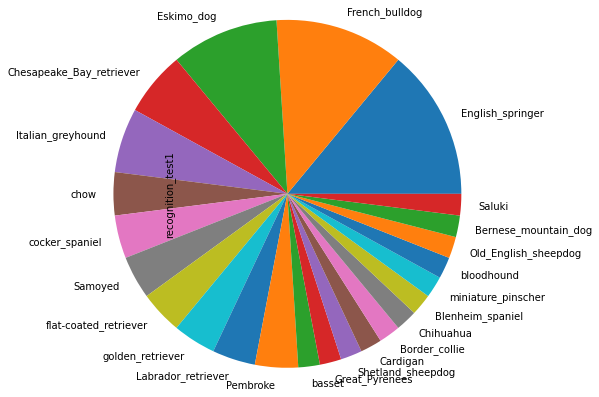

In [258]:
labels = viral.recognition_test1.unique()
viral.recognition_test1.value_counts().plot(kind="pie", labels=labels, radius=2)
# visualize the most popular dog breeds amongst the top 50

In [259]:
viral.head(10)

,favorite_count,recognition_test1,jpg_url,source_x,rating_numerator
63,107956.0,English_springer,https://pbs.twimg.com/ext_tw_video_thumb/87941...,Twitter for iPhone,13
119,106827.0,French_bulldog,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,Twitter for iPhone,13
901,75163.0,Eskimo_dog,https://pbs.twimg.com/ext_tw_video_thumb/73923...,Twitter for iPhone,13
71,71144.0,Chesapeake_Bay_retriever,https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg,Twitter for iPhone,13
35,68152.0,Italian_greyhound,https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg,Twitter for iPhone,12
136,66437.0,chow,https://pbs.twimg.com/media/C_bIo7QXYAAGfPu.jpg,Twitter for iPhone,13
381,57622.0,cocker_spaniel,https://pbs.twimg.com/ext_tw_video_thumb/81782...,Twitter for iPhone,13
120,54720.0,Samoyed,https://pbs.twimg.com/media/DAXXDQNXgAAoYQH.jpg,Twitter for iPhone,12
165,47844.0,flat-coated_retriever,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,Twitter for iPhone,13
42,46860.0,golden_retriever,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,Twitter for iPhone,5


In [260]:
# Favorite counts match the visualization 

In [261]:
viral.value_counts('recognition_test1')
# Display the number of each breed posted to see the most re-occuring breed counts.

recognition_test1
golden_retriever            7
Pembroke                    6
French_bulldog              5
Labrador_retriever          3
Samoyed                     3
miniature_pinscher          2
Border_collie               2
Chesapeake_Bay_retriever    2
Chihuahua                   2
chow                        2
Blenheim_spaniel            2
basset                      2
Shetland_sheepdog           1
flat-coated_retriever       1
cocker_spaniel              1
bloodhound                  1
Bernese_mountain_dog        1
Saluki                      1
Italian_greyhound           1
Great_Pyrenees              1
Eskimo_dog                  1
English_springer            1
Cardigan                    1
Old_English_sheepdog        1
dtype: int64

<AxesSubplot:ylabel='source_x'>

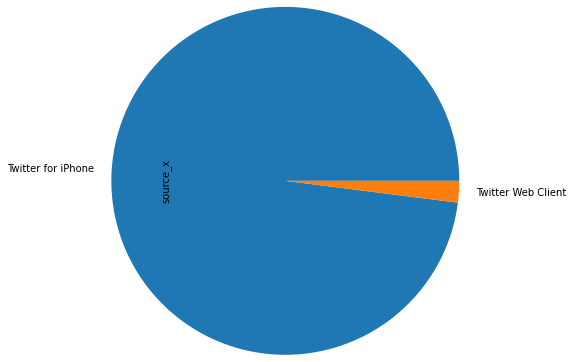

In [262]:
labels = viral.source_x.unique()
viral.source_x.value_counts().plot(kind="pie", labels=labels, radius=2)

In [263]:
viral.value_counts('source_x')

source_x
Twitter for iPhone    49
Twitter Web Client     1
dtype: int64

In [264]:
# The source doesn't seem to have changed much among the top 50 viral posts as compared to the whole dataset
# Posts from the iPhone still make up around 99% of the data

<AxesSubplot:ylabel='recognition_test1'>

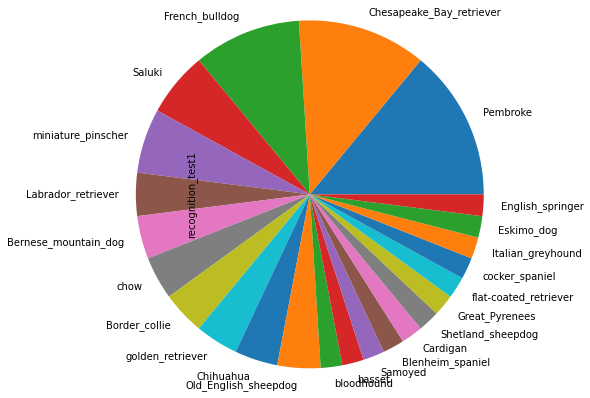

In [265]:
labels = unpopular.recognition_test1.unique()
unpopular.recognition_test1.value_counts().plot(kind="pie", labels=labels, radius=2)
# Double checking the visualizations to see which breeds were the least popular out of the top 50 posts dataset

In [266]:
unpopular.head()

,favorite_count,recognition_test1,jpg_url,source_x,rating_numerator
38,27478.0,Pembroke,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,Twitter for iPhone,14
122,27530.0,Chesapeake_Bay_retriever,https://pbs.twimg.com/media/DAJfxqGVoAAnvQt.jpg,Twitter for iPhone,13
13,27672.0,French_bulldog,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,Twitter for iPhone,12
74,27755.0,Pembroke,https://pbs.twimg.com/media/DCxyahJWsAAddSC.jpg,Twitter for iPhone,12
73,27907.0,Saluki,https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg,Twitter for iPhone,13
